In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rectangle = np.array([
    [0, 0],
    [4, 0],
    [4, 2],
    [0, 2]
])


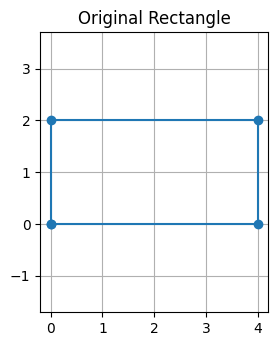

In [3]:
plt.figure(figsize=(10, 8))
vertices = np.append(rectangle, [rectangle[0]], axis=0)
plt.subplot(2, 3, 1)
plt.plot(vertices[:, 0], vertices[:, 1], marker='o')
plt.title("Original Rectangle")
plt.axis('equal')
plt.grid(True)

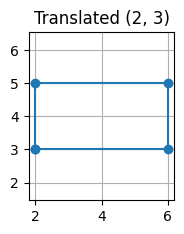

In [4]:
# Translation
T = np.array([
    [1, 0, 2],
    [0, 1, 3],
    [0, 0, 1]
])
homogeneous_vertices = np.hstack((rectangle, np.ones((rectangle.shape[0], 1))))
translated = homogeneous_vertices @ T.T
translated = translated[:, :2]
vertices = np.append(translated, [translated[0]], axis=0)
plt.subplot(2, 3, 2)
plt.plot(vertices[:, 0], vertices[:, 1], marker='o')
plt.title("Translated (2, 3)")
plt.axis('equal')
plt.grid(True)


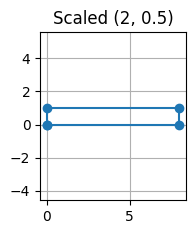

In [5]:
# Scaling
S = np.array([
    [2, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])
scaled = homogeneous_vertices @ S.T
scaled = scaled[:, :2]
vertices = np.append(scaled, [scaled[0]], axis=0)
plt.subplot(2, 3, 3)
plt.plot(vertices[:, 0], vertices[:, 1], marker='o')
plt.title("Scaled (2, 0.5)")
plt.axis('equal')
plt.grid(True)


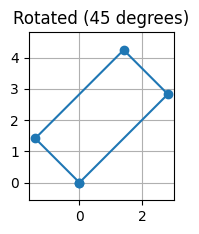

In [6]:
angle = 45
rad = np.radians(angle)
R = np.array([
    [np.cos(rad), -np.sin(rad), 0],
    [np.sin(rad), np.cos(rad), 0],
    [0, 0, 1]
])
rotated = homogeneous_vertices @ R.T
rotated = rotated[:, :2]
vertices = np.append(rotated, [rotated[0]], axis=0)
plt.subplot(2, 3, 4)
plt.plot(vertices[:, 0], vertices[:, 1], marker='o')
plt.title("Rotated (45 degrees)")
plt.axis('equal')
plt.grid(True)

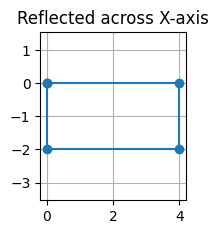

In [7]:

Rx = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])
reflected = homogeneous_vertices @ Rx.T
reflected = reflected[:, :2]
vertices = np.append(reflected, [reflected[0]], axis=0)
plt.subplot(2, 3, 5)
plt.plot(vertices[:, 0], vertices[:, 1], marker='o')
plt.title("Reflected across X-axis")
plt.axis('equal')
plt.grid(True)

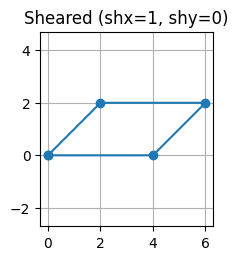

In [8]:

Sh = np.array([
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1]
])
sheared = homogeneous_vertices @ Sh.T
sheared = sheared[:, :2]
vertices = np.append(sheared, [sheared[0]], axis=0)
plt.subplot(2, 3, 6)
plt.plot(vertices[:, 0], vertices[:, 1], marker='o')
plt.title("Sheared (shx=1, shy=0)")
plt.axis('equal')
plt.grid(True)

plt.tight_layout()
plt.show()

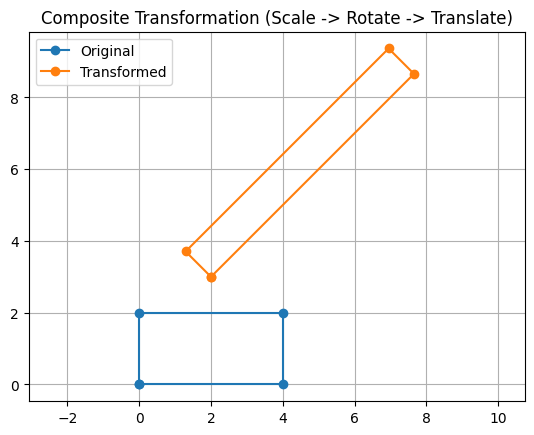

In [9]:

composite_matrix = T @ R @ S
composite = homogeneous_vertices @ composite_matrix.T
composite = composite[:, :2]
vertices_original = np.append(rectangle, [rectangle[0]], axis=0)
vertices_composite = np.append(composite, [composite[0]], axis=0)

plt.figure()
plt.plot(vertices_original[:, 0], vertices_original[:, 1], marker='o', label="Original")
plt.plot(vertices_composite[:, 0], vertices_composite[:, 1], marker='o', label="Transformed")
plt.title("Composite Transformation (Scale -> Rotate -> Translate)")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

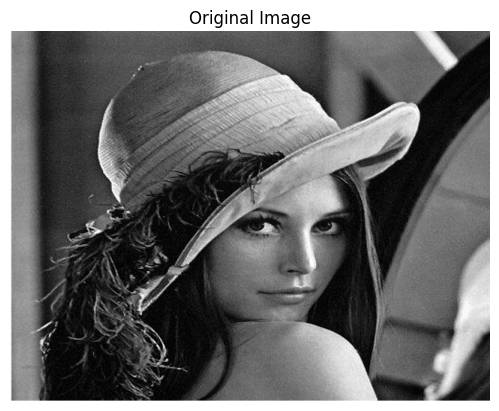

In [10]:

image_path = "Screenshot 2025-01-22 232218.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

plt.figure()
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

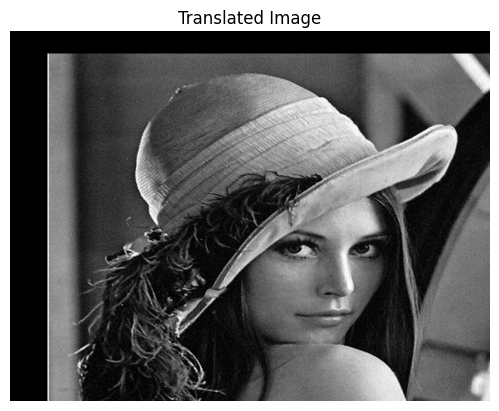

In [11]:
translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])
translated_img = cv2.warpAffine(img, translation_matrix, (w, h))
plt.figure()
plt.imshow(translated_img)
plt.title("Translated Image")
plt.axis('off')
plt.show()


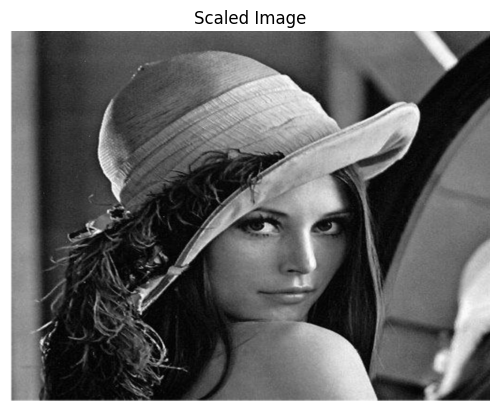

In [12]:
scaled_img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
plt.figure()
plt.imshow(scaled_img)
plt.title("Scaled Image")
plt.axis('off')
plt.show()

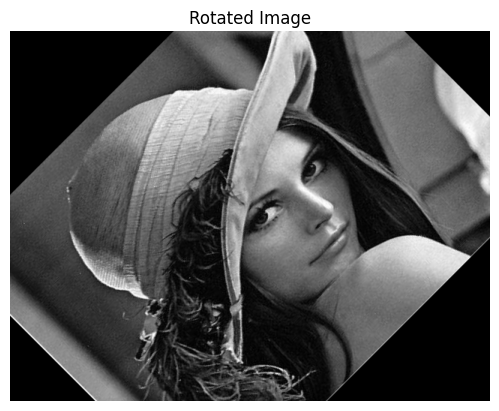

In [13]:

rotation_matrix = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1)
rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
plt.figure()
plt.imshow(rotated_img)
plt.title("Rotated Image")
plt.axis('off')
plt.show()


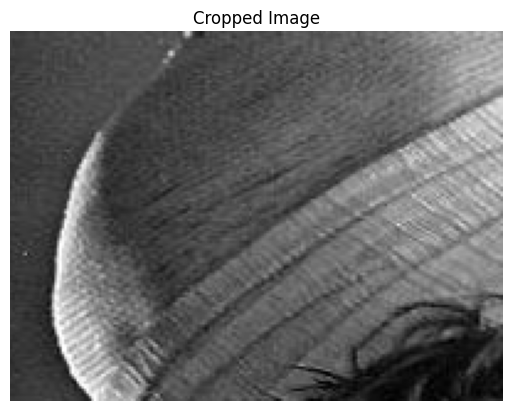

In [14]:

cropped_img = img[50:200, 100:300]
plt.figure()
plt.imshow(cropped_img)
plt.title("Cropped Image")
plt.axis('off')
plt.show()

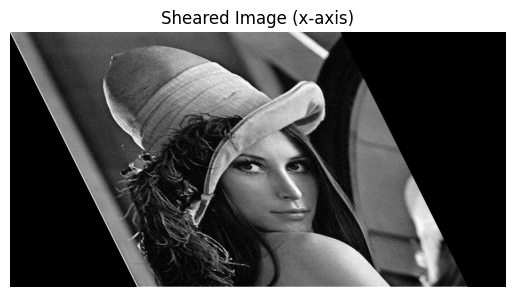

In [15]:

shear_matrix_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_img_x = cv2.warpAffine(img, shear_matrix_x, (int(1.5 * w), h))
plt.figure()
plt.imshow(sheared_img_x)
plt.title("Sheared Image (x-axis)")
plt.axis('off')
plt.show()

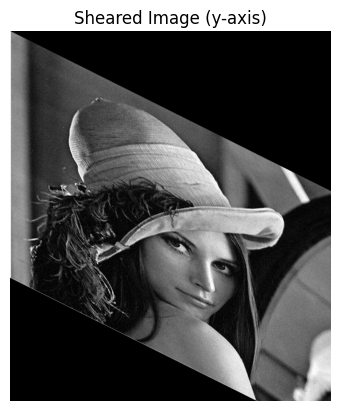

In [16]:

shear_matrix_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_img_y = cv2.warpAffine(img, shear_matrix_y, (w, int(1.5 * h)))
plt.figure()
plt.imshow(sheared_img_y)
plt.title("Sheared Image (y-axis)")
plt.axis('off')
plt.show()
